# ASSIGNMNET 3

# Import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load Data

### Load Expectency income data 

In [2]:
expectency_income = pd.read_csv('life-expectancy-income.csv')
print(expectency_income.shape)
expectency_income = expectency_income.sort_values(by=['District'])
expectency_income.head()

(75, 4)


District  Life expectancy(In Years) Per Capita Income(In USD)  \
58        Achham                      67.14                       536   
36  Arghakhanchi                      68.56                       909   
34       Baglung                      68.83                       868   
32       Baitadi                      68.88                       573   
66       Bajhang                      65.22                       487   

    Unnamed: 3  
58         NaN  
36         NaN  
34         NaN  
32         NaN  
66         NaN

In [3]:
expectency_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 58 to 28
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District                   75 non-null     object 
 1   Life expectancy(In Years)  75 non-null     float64
 2   Per Capita Income(In USD)  75 non-null     object 
 3   Unnamed: 3                 0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 2.9+ KB


In [4]:
expectency_income.describe()

Life expectancy(In Years)  Unnamed: 3
count                  75.000000         0.0
mean                   68.405333         NaN
std                     2.251472         NaN
min                    61.200000         NaN
25%                    67.285000         NaN
50%                    68.550000         NaN
75%                    70.190000         NaN
max                    72.900000         NaN

In [5]:
expectency_income['Unnamed: 3'].unique()

array([nan])

In [6]:
expectency_income = expectency_income.drop(['Unnamed: 3'], axis=1)

Unnamed:3 column has all data null so removing the column as it is no longer required

In [7]:
expectency_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 58 to 28
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District                   75 non-null     object 
 1   Life expectancy(In Years)  75 non-null     float64
 2   Per Capita Income(In USD)  75 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.3+ KB


### Load Literacy rate data 

In [8]:
literacy_rate = pd.read_csv('literacy-rates.csv')
print(literacy_rate.shape)
literacy_rate = literacy_rate.sort_values(by=['District'])

literacy_rate.head()

(75, 5)


District  Total  Female  Male   Year
59        Achham    55.7    42.9  70.7   2013
15  Arghakhanchi    72.6    65.8  81.8   2013
18       Baglung    71.9    65.3  80.6   2013
44       Baitadi    63.0    49.2  79.0   2013
61       Bajhang    55.6    40.1  73.0   2013

In [9]:
literacy_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 59 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  75 non-null     object 
 1   Total     75 non-null     float64
 2   Female    75 non-null     float64
 3   Male      75 non-null     float64
 4    Year     75 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 3.5+ KB


In [10]:
literacy_rate[' Year'].unique()

array([2013])

In [11]:
literacy_rate = literacy_rate.drop([' Year'], axis=1)

Since all the data in the Literacy rate is for 2013, so it might not be required thus removing column

In [12]:
literacy_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 59 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  75 non-null     object 
 1   Total     75 non-null     float64
 2   Female    75 non-null     float64
 3   Male      75 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.9+ KB


In [13]:
literacy_rate.describe()

Total     Female       Male
count  75.0000  75.000000  75.000000
mean   65.1120  56.053333  75.016000
std     9.5331  11.199968   8.464617
min    41.7000  32.000000  50.900000
25%    57.0500  47.600000  69.300000
50%    66.2000  57.100000  76.200000
75%    71.9000  64.350000  80.900000
max    86.3000  79.800000  92.200000

Text(0.5, 1.0, 'Literacy Distribution Plot Male & Female ')

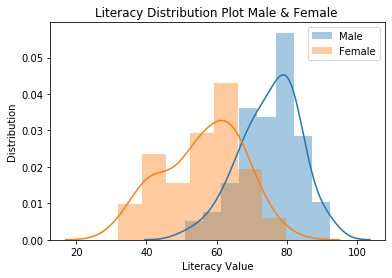

In [14]:
import plotly.express as px

sns.distplot(literacy_rate['Male'],hist=True, label="Male")
sns.distplot(literacy_rate['Female'],hist=True, label="Female")
plt.legend()
plt.ylabel("Distribution")
plt.xlabel("Literacy Value")
plt.title('Literacy Distribution Plot Male & Female ')

Now need to Merge the two tables so performing certain checks to see 

In [15]:
exp_income_literacy = pd.merge(expectency_income, literacy_rate, on='District', how='inner')
exp_income_literacy = exp_income_literacy.sort_values(by=['District'])
exp_income_literacy.shape


(0, 6)

There seems to be some issue while merging tables  so need to check the dataand found that the districts used in both the tables dont match so need to update names on one of the tables to fix the merge issue

In [16]:
exp_income_literacy['District'].unique()

array([], dtype=object)

In [17]:
#there seems to be some issue with the data so to check if there is any difference in data set
diff_district = set(expectency_income['District'].unique()).difference(literacy_rate['District'].unique())
len(diff_district)
print(diff_district)

{'Parsa', 'Dang', 'Kavrepalanchok', 'Kapilbastu', 'Rukum', 'Rupandehi', 'Rolpa', 'Lamjung', 'Chitwan', 'Sarlahi', 'Rautahat', 'Tanahu', 'Taplejung', 'Palpa', 'Ilam', 'Dhankuta', 'Udayapur', 'Baitadi', 'Bajura', 'Darchula', 'Manang', 'Jhapa', 'Sindhupalchok', 'Bhaktapur', 'Mustang', 'Dadeldhura', 'Bara', 'Rasuwa', 'Tehrathum', 'Mahottari', 'Solukhumbu', 'Humla', 'Makwanpur', 'Kanchanpur', 'Dhanusa', 'Panchthar', 'Dolakha', 'Bhojpur', 'Parbat', 'Kaski', 'Sunsari', 'Sankhuwasabha', 'Kalikot', 'Achham', 'Doti', 'Dolpa', 'Myagdi', 'Arghakhanchi', 'Nawalparasi', 'Jumla', 'Morang', 'Baglung', 'Surkhet', 'Kailali', 'Banke', 'Sindhuli', 'Lalitpur', 'Siraha', 'Pyuthan', 'Gorkha', 'Bardiya', 'Nuwakot', 'Kathmandu', 'Bajhang', 'Okhaldhunga', 'Gulmi', 'Dailekh', 'Ramechhap', 'Mugu', 'Syangja', 'Khotang', 'Saptari', 'Dhading', 'Jajarkot', 'Salyan'}


In [18]:
diff_district1 = set(literacy_rate['District'].unique()).difference(expectency_income['District'].unique())
len(diff_district1)
print(diff_district1)

{'Panchthar ', 'Rolpa ', 'Baitadi ', 'Rasuwa ', 'Humla ', 'Mugu ', 'Sarlahi ', 'Siraha ', 'Dadeldhura ', 'Dhanusa ', 'Gorkha ', 'Sindhuli ', 'Kavrepalanchok ', 'Gulmi ', 'Okhaldhunga ', 'Rautahat ', 'Achham ', 'Dolakha ', 'Rupandehi ', 'Khotang ', 'Mustang ', 'Dolpa ', 'Kaski ', 'Bhojpur ', 'Bajhang ', 'Mahottari ', 'Bardiya ', 'Baglung ', 'Morang ', 'Udayapur ', 'Salyan ', 'Dhading ', 'Chitawan ', 'Dhankuta ', 'Parbat ', 'Myagdi ', 'Saptari ', 'Doti ', 'Ilam ', 'Dailekh ', 'Rukum ', 'Terhathum ', 'Arghakhanchi ', 'Makwanpur ', 'Tanahu ', 'Syangja ', 'Darchula ', 'Jajarkot ', 'Lalitpur ', 'Ramechhap ', 'Banke ', 'Kailali ', 'Manang ', 'Dang ', 'Parsa ', 'Taplejung ', 'Palpa ', 'Lamjung ', 'Bhaktapur ', 'Kanchanpur ', 'Nawalparasi ', 'Kathmandu ', 'Kalikot ', 'Nuwakot ', 'Jhapa ', 'Surkhet ', 'Pyuthan ', 'Jumla ', 'Kapilbastu ', 'Sunsari ', 'Solukhumbu ', 'Bara ', 'Sindhupalchok ', 'Sankhuwasabha ', 'Bajura '}


Using Set thery to get the differrnce in district used found that District in Literacy rate table has space at the end of the name and two two district names mismatch so was not working. Using rstrip() to strip out the white space and rename the District name for the mismatched Districs  

In [19]:
#There seems to be space at end of each District in literacy_rate so it is not matching so need to clean the dataset
literacy_rate['District']=literacy_rate['District'].str.rstrip()

Now rechecking difference after removing the space from end of District further gave Spedlling missmatch for two districts Chitwan nan Terhathum so now fixing it

In [20]:
diff_district = set(literacy_rate['District'].unique()).difference(expectency_income['District'].unique())
len(diff_district)
print(diff_district)

{'Terhathum', 'Chitawan'}


Still some issue 
'Chitawan', 'Chitwan' && 'Tehrathum', 'Terhathum''

In [21]:
literacy_rate['District'] = literacy_rate['District'].map(lambda x: 'Chitwan' if x == 'Chitawan' else x)

In [22]:
literacy_rate['District'] = literacy_rate['District'].map(lambda x: 'Tehrathum' if x == 'Terhathum' else x)

In [23]:
diff_district = set(literacy_rate['District'].unique()).difference(expectency_income['District'].unique())
len(diff_district)
print(diff_district)

set()


Now Finally the Distrct names matches and thus ready to merge data and sort data by District Name

In [24]:
# Merge the dataset
exp_income_literacy = pd.merge(expectency_income, literacy_rate, on='District', how='inner')
exp_income_literacy = exp_income_literacy.sort_values(by=['District'])

exp_income_literacy.shape


(75, 6)

Now need to confirm if there is any missing data. THe result shown is FALSE thus the data now is cleaned and ready for analysis

In [25]:
exp_income_literacy.isnull().values.any()

False

False showed there is No missing data Now having a look on summerizded description feature. We will use 'value_counts( )' and convert the result to a DataFame.

In [26]:
exp_income_literacy['District'].unique()

array(['Achham', 'Arghakhanchi', 'Baglung', 'Baitadi', 'Bajhang',
       'Bajura', 'Banke', 'Bara', 'Bardiya', 'Bhaktapur', 'Bhojpur',
       'Chitwan', 'Dadeldhura', 'Dailekh', 'Dang', 'Darchula', 'Dhading',
       'Dhankuta', 'Dhanusa', 'Dolakha', 'Dolpa', 'Doti', 'Gorkha',
       'Gulmi', 'Humla', 'Ilam', 'Jajarkot', 'Jhapa', 'Jumla', 'Kailali',
       'Kalikot', 'Kanchanpur', 'Kapilbastu', 'Kaski', 'Kathmandu',
       'Kavrepalanchok', 'Khotang', 'Lalitpur', 'Lamjung', 'Mahottari',
       'Makwanpur', 'Manang', 'Morang', 'Mugu', 'Mustang', 'Myagdi',
       'Nawalparasi', 'Nuwakot', 'Okhaldhunga', 'Palpa', 'Panchthar',
       'Parbat', 'Parsa', 'Pyuthan', 'Ramechhap', 'Rasuwa', 'Rautahat',
       'Rolpa', 'Rukum', 'Rupandehi', 'Salyan', 'Sankhuwasabha',
       'Saptari', 'Sarlahi', 'Sindhuli', 'Sindhupalchok', 'Siraha',
       'Solukhumbu', 'Sunsari', 'Surkhet', 'Syangja', 'Tanahu',
       'Taplejung', 'Tehrathum', 'Udayapur'], dtype=object)

In [27]:
exp_income_literacy.head()

District  Life expectancy(In Years) Per Capita Income(In USD)  Total  \
0        Achham                      67.14                       536   55.7   
1  Arghakhanchi                      68.56                       909   72.6   
2       Baglung                      68.83                       868   71.9   
3       Baitadi                      68.88                       573   63.0   
4       Bajhang                      65.22                       487   55.6   

   Female  Male  
0    42.9  70.7  
1    65.8  81.8  
2    65.3  80.6  
3    49.2  79.0  
4    40.1  73.0

# Analysis and Data Visualization

Simple Bar plot showing the Life Expectanct in years by District shows District 20 has lowest life span of around 60

In [28]:
colors = ['cyan', 'red', 'green', 'blue', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


fig=px.scatter(literacy_rate, x='Male',y='Female',hover_data=['District'],width=600, height=600)
fig.update_layout(
    title="Male Vs Female Literacy Rate",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
)
fig.show()

In [60]:
fig=px.scatter(exp_income_literacy, exp_income_literacy['Per Capita Income(In USD)'],exp_income_literacy['Life expectancy(In Years)'],hover_data=['District'],width=600, height=600)
fig.update_layout(
    title="Life Expectancy V Per Capita Income(In USD)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
)
fig.show()

Text(0.5, 1, '\nCorrelation - Life Expectancy, Per Capita with Gender')

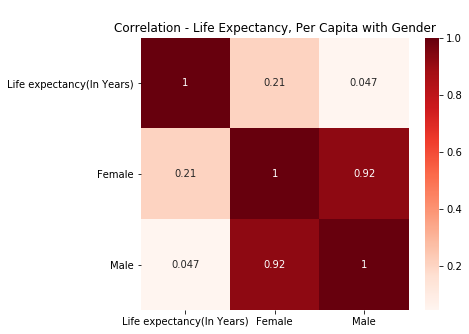

In [29]:
plt.figure(figsize=(6,5))
cor=exp_income_literacy.drop(columns=['Total']).corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.title('\nCorrelation - Life Expectancy, Per Capita with Gender')

In [30]:
px.scatter_3d(exp_income_literacy, x='Female', y='Life expectancy(In Years)', z='Per Capita Income(In USD)',color=exp_income_literacy['Female'],hover_data=['District'])


In [31]:
px.scatter_3d(exp_income_literacy, x='Male', y='Life expectancy(In Years)', z='Per Capita Income(In USD)',color=exp_income_literacy['Male'],hover_data=['District'])

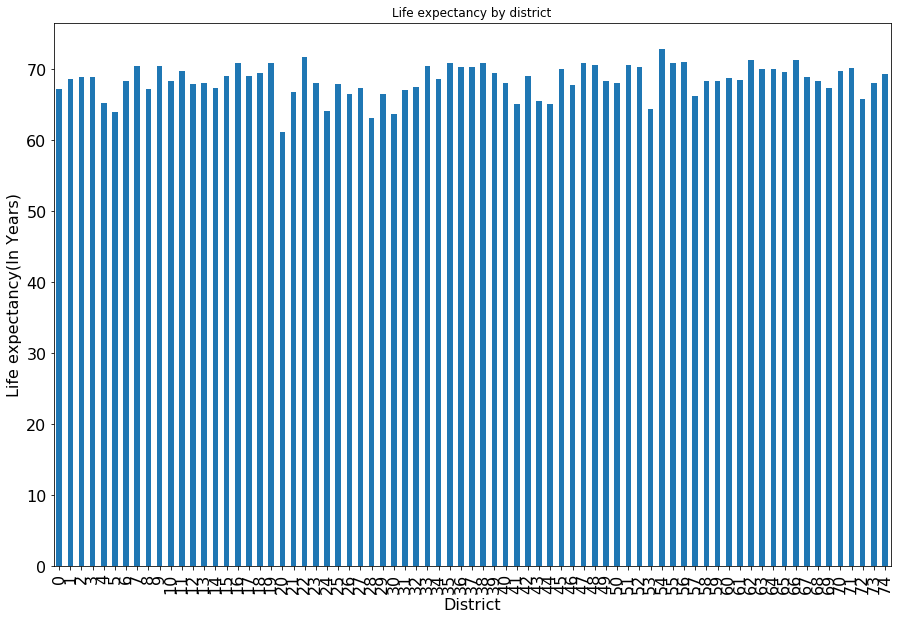

In [32]:
district = exp_income_literacy['Life expectancy(In Years)']
district = pd.DataFrame(district)

plot = district.plot(kind='bar', title='Life expectancy by district', figsize=(15, 10), legend=False, fontsize=16, edgecolor = 'black', linewidth=0);
plot.set_ylabel('Life expectancy(In Years)', fontsize=16)
plot.set_xlabel('District', fontsize=16)
plt.show()

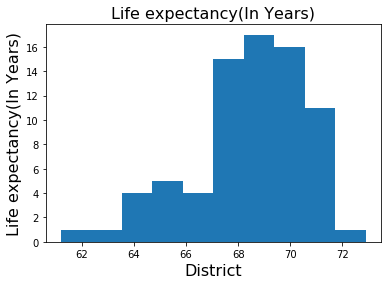

In [33]:
plot = exp_income_literacy['Life expectancy(In Years)'].plot.hist()
plot.set_title('Life expectancy(In Years)', fontsize=16)

plot.set_ylabel('Life expectancy(In Years)', fontsize=16)
plot.set_xlabel('District', fontsize=16)
plt.show()

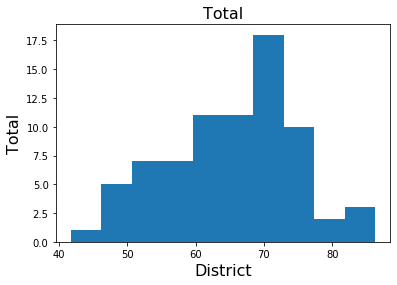

In [34]:
plot = exp_income_literacy['Total'].plot.hist()

plot.set_title('Total', fontsize=16)

plot.set_ylabel('Total', fontsize=16)
plot.set_xlabel('District', fontsize=16)
plt.show()

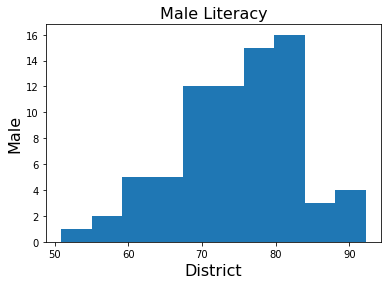

In [35]:
plot_male = exp_income_literacy['Male'].plot.hist()

plot_male.set_title('Male Literacy', fontsize=16)

plot_male.set_ylabel('Male', fontsize=16)
plot_male.set_xlabel('District', fontsize=16)
plt.show()

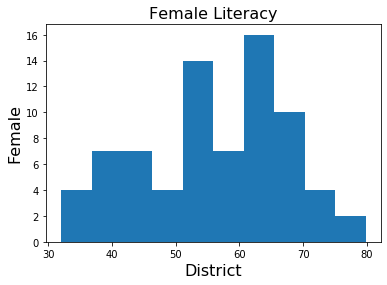

In [36]:
plot_female = exp_income_literacy['Female'].plot.hist()
plot_female.set_title('Female Literacy', fontsize=16)

plot_female.set_ylabel('Female', fontsize=16)
plot_female.set_xlabel('District', fontsize=16)
plt.show()

Now Doing a pair plot to see which attribute is correlated

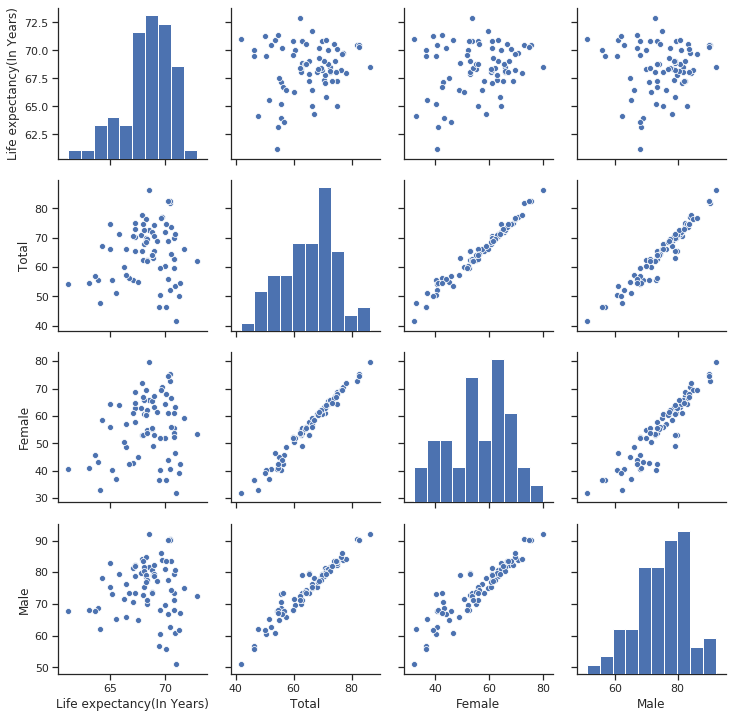

In [37]:
sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("exp_inc_literacy")
g = sns.pairplot(exp_income_literacy)


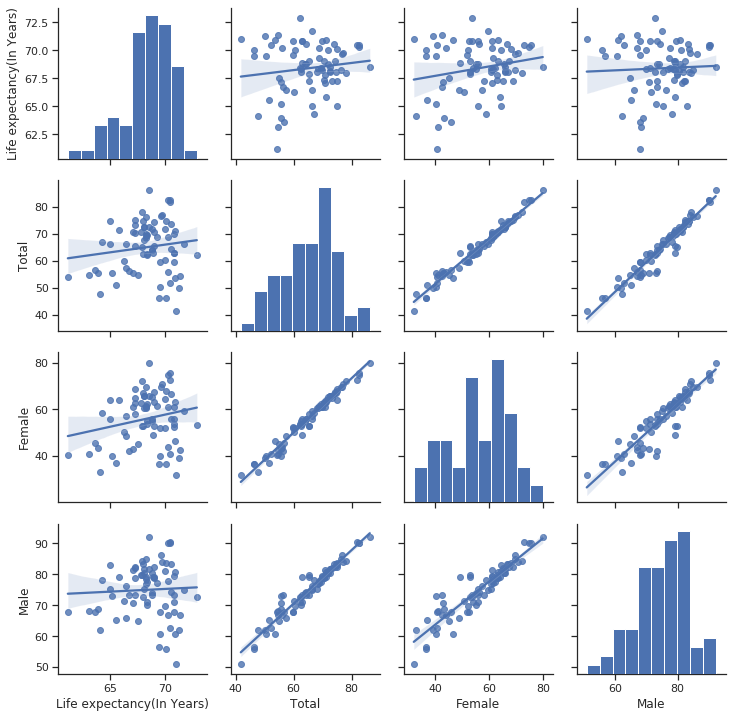

In [38]:
g = sns.pairplot(exp_income_literacy, kind="reg")

In [39]:
exp_income_literacy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District                   75 non-null     object 
 1   Life expectancy(In Years)  75 non-null     float64
 2   Per Capita Income(In USD)  75 non-null     object 
 3   Total                      75 non-null     float64
 4   Female                     75 non-null     float64
 5   Male                       75 non-null     float64
dtypes: float64(4), object(2)
memory usage: 6.6+ KB


In [40]:
exp_income_literacy.describe()

Life expectancy(In Years)    Total     Female       Male
count                  75.000000  75.0000  75.000000  75.000000
mean                   68.405333  65.1120  56.053333  75.016000
std                     2.251472   9.5331  11.199968   8.464617
min                    61.200000  41.7000  32.000000  50.900000
25%                    67.285000  57.0500  47.600000  69.300000
50%                    68.550000  66.2000  57.100000  76.200000
75%                    70.190000  71.9000  64.350000  80.900000
max                    72.900000  86.3000  79.800000  92.200000

Per Capita Income(In USD)  is datatype onject so converting to integer

In [41]:
exp_income_literacy['Per Capita Income(In USD)'] = exp_income_literacy['Per Capita Income(In USD)'].str.replace(',','')
exp_income_literacy['Per Capita Income(In USD)'] = exp_income_literacy['Per Capita Income(In USD)'].astype(int)

In [42]:
exp_income_literacy['Per Capita Income(In USD)']

0      536
1      909
2      868
3      573
4      487
      ... 
70    1215
71    1072
72    1313
73    1419
74     920
Name: Per Capita Income(In USD), Length: 75, dtype: int64

### Correlation

In [43]:
exp_income_literacy.corr()

Life expectancy(In Years)  \
Life expectancy(In Years)                   1.000000   
Per Capita Income(In USD)                   0.070954   
Total                                       0.134884   
Female                                      0.209683   
Male                                        0.046707   

                           Per Capita Income(In USD)     Total    Female  \
Life expectancy(In Years)                   0.070954  0.134884  0.209683   
Per Capita Income(In USD)                   1.000000  0.506040  0.498649   
Total                                       0.506040  1.000000  0.986817   
Female                                      0.498649  0.986817  1.000000   
Male                                        0.419661  0.971105  0.924431   

                               Male  
Life expectancy(In Years)  0.046707  
Per Capita Income(In USD)  0.419661  
Total                      0.971105  
Female                     0.924431  
Male                       1.000000

Getting the summary statistics for numerical columns. We can get statistics on the entire data frame or a series (a column etc).

In [44]:
exp_income_literacy.describe()

Life expectancy(In Years)  Per Capita Income(In USD)    Total  \
count                  75.000000                  75.000000  75.0000   
mean                   68.405333                1079.826667  65.1120   
std                     2.251472                 443.052171   9.5331   
min                    61.200000                 487.000000  41.7000   
25%                    67.285000                 797.500000  57.0500   
50%                    68.550000                1007.000000  66.2000   
75%                    70.190000                1219.000000  71.9000   
max                    72.900000                3166.000000  86.3000   

          Female       Male  
count  75.000000  75.000000  
mean   56.053333  75.016000  
std    11.199968   8.464617  
min    32.000000  50.900000  
25%    47.600000  69.300000  
50%    57.100000  76.200000  
75%    64.350000  80.900000  
max    79.800000  92.200000

Plotting correlation plot for Per capita income and Life expecrancy

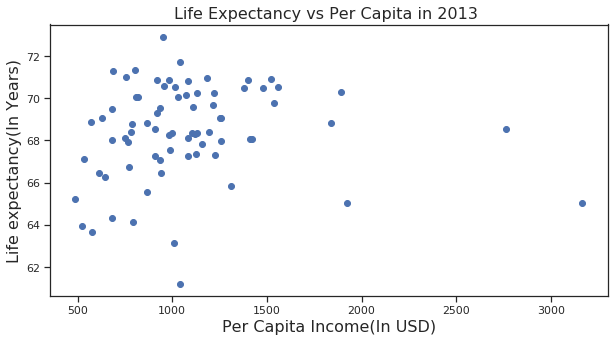

In [45]:
fig = plt.figure(figsize=(10,5))
plt.scatter(exp_income_literacy['Per Capita Income(In USD)'],exp_income_literacy['Life expectancy(In Years)'])
plt.title('Life Expectancy vs Per Capita in 2013 ',  fontsize=16)
plt.ylabel('Life expectancy(In Years)',  fontsize=16)
plt.xlabel('Per Capita Income(In USD)',  fontsize=16)
plt.show()

In [46]:
exp_income_literacy.shape

(75, 6)

In [47]:
# exp_income_literacy['Per Capita Income(In USD)'].corr(exp_income_literacy['Life expectancy(In Years)'])

# Standardization

Now Need to normalize the data to scale the data to 0 and 1 range so we gonna use standard scaler library to scale down the data 

In [48]:
from sklearn.preprocessing import StandardScaler

Create a normalization model and fit it to the data and generate scaled data

In [49]:
evaluation_result = []
scaler = StandardScaler()

X = exp_income_literacy.drop(columns=['District', 'Total'])
print(X)
# y = exp_income_literacy['Per Capita Income(In USD)']
scaler.fit(X)

LitInc_scaled_data = scaler.transform(X)
LitInc_scaled_data.shape

    Life expectancy(In Years)  Per Capita Income(In USD)  Female  Male
0                       67.14                        536    42.9  70.7
1                       68.56                        909    65.8  81.8
2                       68.83                        868    65.3  80.6
3                       68.88                        573    49.2  79.0
4                       65.22                        487    40.1  73.0
..                        ...                        ...     ...   ...
70                      69.68                       1215    69.6  86.1
71                      70.14                       1072    67.9  83.7
72                      65.83                       1313    64.1  79.3
73                      68.05                       1419    67.0  83.5
74                      69.29                        920    61.5  77.2

[75 rows x 4 columns]


(75, 4)

In [50]:
X.head()

Life expectancy(In Years)  Per Capita Income(In USD)  Female  Male
0                      67.14                        536    42.9  70.7
1                      68.56                        909    65.8  81.8
2                      68.83                        868    65.3  80.6
3                      68.88                        573    49.2  79.0
4                      65.22                        487    40.1  73.0

In [51]:
LitInc_scaled_data[:5]

array([[-0.56578717, -1.23572093, -1.1823167 , -0.51332084],
       [ 0.06915839, -0.38816428,  0.87610087,  0.80685092],
       [ 0.18988747, -0.48132734,  0.83115725,  0.66412965],
       [ 0.21224471, -1.15164695, -0.61602715,  0.47383462],
       [-1.42430511, -1.34706215, -1.43400094, -0.23977174]])

Above sample scaled data shows that the data has been normalized 

# KMeans CLUSTERING

In [52]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

### Kmeans Clustering

In [53]:
kmeans_df_scaled = pd.DataFrame(LitInc_scaled_data, columns=X.columns)
kmeans_df_scaled['District'] = exp_income_literacy['District']

In [54]:
kmeans_df_scaled.describe().round(4)

Life expectancy(In Years)  Per Capita Income(In USD)   Female     Male
count                    75.0000                    75.0000  75.0000  75.0000
mean                      0.0000                     0.0000  -0.0000   0.0000
std                       1.0067                     1.0067   1.0067   1.0067
min                      -3.2218                    -1.3471  -2.1621  -2.8682
25%                      -0.5010                    -0.6415  -0.7598  -0.6798
50%                       0.0647                    -0.1655   0.0941   0.1408
75%                       0.7980                     0.3162   0.7458   0.6998
max                       2.0098                     4.7403   2.1345   2.0438

In [55]:
Sum_of_squared_distances=[]
Silhouette=[]
k_values=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(LitInc_scaled_data)
    k_values.append(k)
    Sum_of_squared_distances.append(kmeans.inertia_)
    b = silhouette_score(LitInc_scaled_data, kmeans.labels_)
    Silhouette.append(b)
    print("cluster: ", k,"Inertia: ",kmeans.inertia_,
          'Silhouette:', silhouette_score(LitInc_scaled_data, kmeans.labels_))

cluster:  2 Inertia:  186.81253280380463 Silhouette: 0.33335065697828753
cluster:  3 Inertia:  141.99332751118027 Silhouette: 0.3529050467966264
cluster:  4 Inertia:  107.94490604958527 Silhouette: 0.37343379977758046
cluster:  5 Inertia:  86.02249178273615 Silhouette: 0.31140721221020023
cluster:  6 Inertia:  71.77133611443935 Silhouette: 0.3031290179482093
cluster:  7 Inertia:  64.06760158780207 Silhouette: 0.2928047292857756
cluster:  8 Inertia:  56.44832718440356 Silhouette: 0.2839187446989456
cluster:  9 Inertia:  50.78539911813376 Silhouette: 0.29174722909194034


In [56]:
Silhouette

[0.33335065697828753,
 0.3529050467966264,
 0.37343379977758046,
 0.31140721221020023,
 0.3031290179482093,
 0.2928047292857756,
 0.2839187446989456,
 0.29174722909194034]

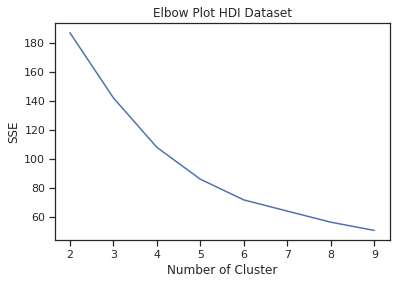

In [57]:
plt.title('Elbow Plot HDI Dataset')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.plot(k_values,Sum_of_squared_distances)

From elbow plots no of cluster = 6 seems to be better

In [61]:
kmeans=KMeans(n_clusters=6, random_state=1)
kmeans.fit(LitInc_scaled_data)
kmeans_df_clustered = exp_income_literacy.copy()
kmeans_df_clustered['KMeans Label'] = kmeans.labels_
exp_income_literacy['KMeans Label']=kmeans.labels_

In [63]:
pd.set_option('max_rows', 100)
kmeans_df_clustered.sort_values(by='KMeans Label')
kmeans_df_clustered.tail()

District  Life expectancy(In Years)  Per Capita Income(In USD)  Total  \
70    Syangja                      69.68                       1215   76.6   
71     Tanahu                      70.14                       1072   74.8   
72  Taplejung                      65.83                       1313   71.3   
73  Tehrathum                      68.05                       1419   74.6   
74   Udayapur                      69.29                        920   68.8   

    Female  Male  KMeans Label  
70    69.6  86.1             0  
71    67.9  83.7             0  
72    64.1  79.3             5  
73    67.0  83.5             0  
74    61.5  77.2             3

In [64]:
y_kmeans = kmeans.predict(LitInc_scaled_data)
y_kmeans

array([1, 5, 5, 3, 1, 1, 3, 4, 5, 0, 5, 0, 5, 3, 5, 3, 3, 0, 4, 3, 1, 1,
       3, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1, 0, 2, 0, 3, 0, 0, 4, 5, 2, 5, 1,
       5, 0, 5, 3, 3, 0, 5, 0, 4, 5, 3, 4, 4, 1, 3, 5, 3, 5, 4, 4, 3, 3,
       4, 5, 5, 5, 0, 0, 5, 0, 3], dtype=int32)

In [65]:
 import plotly.express as px

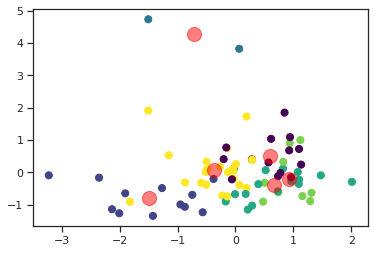

In [66]:
plt.scatter(LitInc_scaled_data[:, 0], LitInc_scaled_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


In [67]:
pca = PCA(n_components=2, random_state = 1)
pca = pca.fit(LitInc_scaled_data)
scaled_transformed = pca.transform(LitInc_scaled_data)
plot_data = pd.DataFrame(scaled_transformed, columns=['C1', 'C2'])
plot_data['Label'] = kmeans.labels_
plot_data['District'] = exp_income_literacy['District'].tolist()
fig = px.scatter(plot_data, x="C1", y="C2", color='Label', hover_data=['District'])
fig.show()

In [70]:
z=[]

In [71]:
from sklearn import metrics


n_samples, n_features = LitInc_scaled_data.shape
n_digits = len(np.unique(y_kmeans))
labels = y_kmeans
n_noise_k_means = kmeans.labels_ 
sample_size = 75

def evaluate_kmeans(estimator, name, data):
#     result = []
#     result.append(name)
    estimator.fit(data)
    print("Model Evaluation: ", name)
    print("*************************************")
    clusters = estimator.n_clusters
    homogeneity_score = metrics.homogeneity_score(labels, estimator.labels_)
    completeness_score = metrics.completeness_score(labels, estimator.labels_)
    v_measure_score = metrics.v_measure_score(labels, estimator.labels_)
    adjusted_rand_score = metrics.adjusted_rand_score(labels, estimator.labels_)
    adjusted_mutual_info_score = metrics.adjusted_mutual_info_score(labels, estimator.labels_)
    silhouette_score = metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)
    print('Estimated number of clusters: %d' % clusters)
#     result.append(clusters)

    print("Homogeneity: %0.3f" % homogeneity_score)
#     result.append(homogeneity_score)
    
    print("Completeness: %0.3f" % completeness_score)
#     result.append(completeness_score)
    
    print("V-measure: %0.3f" % v_measure_score)
#     result.append(v_measure_score)
    
    print("Adjusted Rand Index: %0.3f" % adjusted_rand_score )
#     result.append(adjusted_rand_score)
    
    print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score )
#     result.append(adjusted_mutual_info_score)
    print("silhouette_score:", silhouette_score)
#     result.append(silhouette_score)
#     print(result)
#     z.append(result)


In [72]:
#  list(estimator.labels_).count(-1))
print("noise:", list(kmeans.labels_).count(-1))
evaluate_kmeans(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=LitInc_scaled_data)


noise: 0
Model Evaluation:  k-means++
*************************************
Estimated number of clusters: 6
Homogeneity: 0.847
Completeness: 0.846
V-measure: 0.846
Adjusted Rand Index: 0.814
Adjusted Mutual Information: 0.827
silhouette_score: 0.29703249610999305


### KMeans clustering using Outlier detection

In [73]:
kmeans_outlier = KMeans(n_clusters=1)
kmeans_outlier.fit(LitInc_scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
# identify the 5 closest points
distances = kmeans_outlier.transform(LitInc_scaled_data)

In [75]:
# argsort returns an array of indexes which will sort the array
# in ascending order. Reverse it with [::-1]
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

In [76]:
print(LitInc_scaled_data[sorted_idx][:, 0])
print(LitInc_scaled_data[sorted_idx][:, 1])

[-1.50479117  0.06468694  1.15572016 -3.22182705 -1.90275   ]
[ 4.74034873  3.82689626 -0.7335493  -0.09049693 -0.64947531]


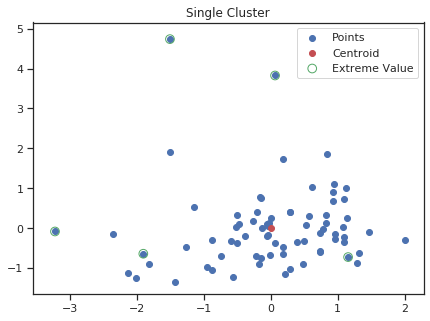

In [77]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(LitInc_scaled_data[:, 0], LitInc_scaled_data[:, 1], label='Points')
ax.scatter(kmeans_outlier.cluster_centers_[:, 0],
           kmeans_outlier.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(LitInc_scaled_data[sorted_idx][:, 0],
           LitInc_scaled_data[sorted_idx][:, 1],
           label='Extreme Value', edgecolors='g',
           facecolors='none', s=75)
ax.legend(loc='best')

From the above plot got that there are 5 outliers  denoted by Extreme Values and Point in red is centroid

In [78]:
n_noise_k_means = len(LitInc_scaled_data[sorted_idx][:, 0])
print(n_noise_k_means)

5


In [79]:
# simulating removing these outliers
original_LitInc_scaled_data = LitInc_scaled_data
new_LitInc_scaled_data = np.delete(original_LitInc_scaled_data, sorted_idx, axis=0)

In [80]:
# this causes the centroids to move slightly
outlier_kmeans = KMeans(n_clusters=6)
outlier_kmeans.fit(new_LitInc_scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
outlier_y_kmeans = outlier_kmeans.predict(new_LitInc_scaled_data)
outlier_y_kmeans

array([3, 2, 2, 1, 3, 3, 1, 4, 5, 0, 2, 0, 1, 1, 5, 1, 1, 2, 4, 1, 3, 1,
       2, 2, 3, 2, 3, 5, 3, 2, 3, 0, 2, 2, 0, 2, 4, 5, 2, 3, 5, 2, 2, 1,
       1, 2, 2, 2, 4, 5, 1, 4, 3, 1, 2, 1, 2, 4, 4, 1, 1, 4, 5, 2, 2, 2,
       2, 5, 2, 2], dtype=int32)

In [82]:
from sklearn import metrics


n_samples, n_features = new_LitInc_scaled_data.shape
n_digits = len(np.unique(outlier_y_kmeans))
labels = outlier_y_kmeans

sample_size = 75

print("noise:", n_noise_k_means)
evaluate_kmeans(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means with Outlier detection", data=new_LitInc_scaled_data)

noise: 5
Model Evaluation:  k-means with Outlier detection
*************************************
Estimated number of clusters: 6
Homogeneity: 0.737
Completeness: 0.708
V-measure: 0.722
Adjusted Rand Index: 0.568
Adjusted Mutual Information: 0.682
silhouette_score: 0.29766792857176755


Now performing PCA analysis

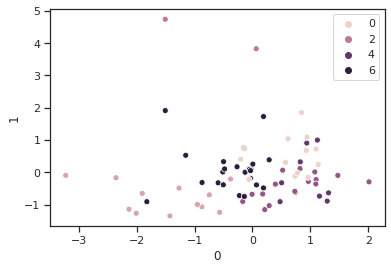

In [83]:
sns.scatterplot(x=0, y=1, data=pd.DataFrame(LitInc_scaled_data), hue=pd.Series(kmeans.labels_).map(str))

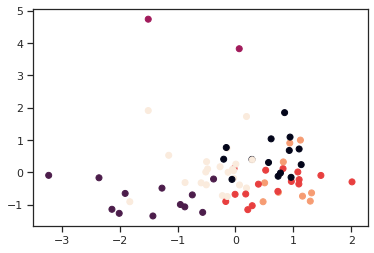

In [84]:
plt.scatter(LitInc_scaled_data[:,0], LitInc_scaled_data[:,1], c=kmeans.labels_)

In [85]:
plot_data = pd.DataFrame(scaled_transformed, columns=['C1', 'C2'])
plot_data['Label'] = kmeans_outlier.labels_
plot_data['District'] = exp_income_literacy['District'].tolist()
fig = px.scatter(plot_data, x="C1", y="C2", color='Label', hover_data=['District'])
fig.show()

##### PCA

As per the PCA Rule , the number of clusters should be one that is less than number of features or minimum no of clustes obtained from Silhouette method or elbow method so both the methos so considering 4 as optimal cluster point

In [86]:
n_samples, n_features = LitInc_scaled_data.shape
n_digits = len(np.unique(y_kmeans))
labels = y_kmeans
n_noise_k_means = kmeans.labels_ 
sample_size = 75

In [87]:
pca = PCA(n_components=2, random_state = 1)
pca = pca.fit(LitInc_scaled_data)
scaled_transformed = pca.transform(LitInc_scaled_data)
n_digits = 4
# labels = outlier_y_kmeans


In [88]:
# pca = PCA(n_components= 4).fit(LitInc_scaled_data)
print('----------PCA-ANALYSIS----------')
print("Noise:", n_noise_k_means)
evaluate_kmeans(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="PCA-based", data=scaled_transformed)

----------PCA-ANALYSIS----------
Noise: [1 5 5 3 1 1 3 4 5 0 5 0 5 3 5 3 3 0 4 3 1 1 3 5 1 0 1 5 1 5 1 5 1 0 2 0 3
 0 0 4 5 2 5 1 5 0 5 3 3 0 5 0 4 5 3 4 4 1 3 5 3 5 4 4 3 3 4 5 5 5 0 0 5 0
 3]
Model Evaluation:  PCA-based
*************************************
Estimated number of clusters: 4
Homogeneity: 0.564
Completeness: 0.761
V-measure: 0.648
Adjusted Rand Index: 0.501
Adjusted Mutual Information: 0.618
silhouette_score: 0.4236209710541152


# DBSCAN Clustering

In [89]:
def neigh(scaled_data,n_of_neigh):
    neigh= NearestNeighbors(n_neighbors=n_of_neigh)
    nbrs= neigh.fit(scaled_data)
    distances, indices = nbrs.kneighbors(scaled_data)
    print(distances.shape)
    distances =np.sort(distances, axis =0)
    distances_=distances[:,n_of_neigh-1]
    return distances, indices, distances_

merged_distances,merged_indices,merged_distances_=neigh(LitInc_scaled_data,3)

(75, 3)


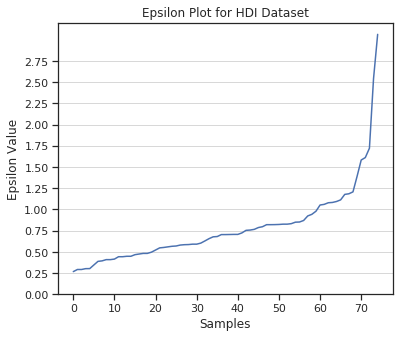

In [90]:
def epsilon_plot(scaled_data,distances_):  
    plt.plot(distances_)
    plt.grid(color='grey', linestyle='-',axis='y',alpha=0.3)
    plt.xlabel('Samples')
    plt.ylabel('Epsilon Value')
    plt.yticks(np.arange(0,3,0.25))
    plt.show()

plt.figure(figsize=(6,5))
plt.title('Epsilon Plot for HDI Dataset')
epsilon_plot(LitInc_scaled_data,merged_distances_)

In [94]:
def dbscan(eps,min_samples,scaled_data,dataset):
    dbscan=DBSCAN(eps=eps,min_samples=min_samples)
    dbscan.fit(scaled_data)
    dataset['DBSCAN Label']=dbscan.labels_
    print(np.unique(dbscan.labels_))
    return dbscan.labels_

In [95]:
life_lit=dbscan(0.45,3,LitInc_scaled_data, exp_income_literacy)
print(life_lit)


[-1  0  1  2  3  4]
[-1  0  0 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  4  1 -1  2 -1 -1  2 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  3  1 -1
  2 -1  1  3 -1 -1 -1 -1 -1 -1  4  1  4  1 -1 -1 -1 -1 -1 -1  1 -1 -1  3
 -1 -1 -1]


In [96]:
min_samples = 3
eps = 0.8

# dbscan = DBSCAN(eps=2., min_samples=8)
dbscan = DBSCAN(eps=0.8, min_samples=3)

y_dbscan = dbscan.fit_predict(LitInc_scaled_data)
exp_income_literacy['DBSCAN Label'] = dbscan.labels_

In [97]:
str(exp_income_literacy['DBSCAN Label'].tolist())


'[-1, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, 0, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, 1, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, -1, 1, 0, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0]'

In [98]:
pd.set_option('max_rows', 100)
exp_income_literacy.sort_values(by='DBSCAN Label')

District  Life expectancy(In Years)  Per Capita Income(In USD)  \
0           Achham                      67.14                        536   
44         Mustang                      65.04                       1922   
34       Kathmandu                      68.55                       2764   
32      Kapilbastu                      67.56                        990   
30         Kalikot                      63.64                        578   
28           Jumla                      63.14                       1007   
52           Parsa                      70.25                       1223   
26        Jajarkot                      66.45                        611   
53         Pyuthan                      64.33                        681   
24           Humla                      64.15                        794   
54       Ramechhap                      72.90                        951   
55          Rasuwa                      70.91                       1520   
21            Doti                      66.74                        774   
43            Mugu                      65.57                        866   
56        Rautahat                      70.99                        757   
57           Rolpa                      66.28                        643   
20           Dolpa                      61.20                       1040   
41          Manang                      65.04                       3166   
72       Taplejung                      65.83                       1313   
62         Saptari                      71.34                        801   
66          Siraha                      71.29                        689   
67      Solukhumbu                      68.83                       1841   
7             Bara                      70.50                       1480   
5           Bajura                      63.92                        523   
4          Bajhang                      65.22                        487   
45          Myagdi                      70.05                       1028   
46     Nawalparasi                      67.81                       1157   
47         Nuwakot                      70.81                       1086   
48     Okhaldhunga                      70.56                        957   
71          Tanahu                      70.14                       1072   
49           Palpa                      68.27                        985   
70         Syangja                      69.68                       1215   
58           Rukum                      68.39                        782   
59       Rupandehi                      68.29                       1123   
69         Surkhet                      67.28                        911   
68         Sunsari                      68.33                       1104   
65   Sindhupalchok                      69.57                       1110   
64        Sindhuli                      70.04                        822   
61   Sankhuwasabha                      68.42                       1193   
60          Salyan                      68.80                        786   
50       Panchthar                      68.12                       1082   
51          Parbat                      70.55                       1013   
37        Lalitpur                      70.30                       1894   
40       Makwanpur                      68.08                       1410   
1     Arghakhanchi                      68.56                        909   
2          Baglung                      68.83                        868   
3          Baitadi                      68.88                        573   
6            Banke                      68.35                       1133   
8          Bardiya                      67.26                       1086   
9        Bhaktapur                      70.48                       1379   
10         Bhojpur                      68.33                        999   
11         Chitwan                      69.78             

In [99]:
colors = ['purple', 'red', 'green', 'yellow', 'skyblue','green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [100]:
fig=px.scatter(exp_income_literacy, x= 'Life expectancy(In Years)',y='Per Capita Income(In USD)',color='DBSCAN Label',hover_data=['District'],width=600, height=400)
fig.update_layout(
    title="Clusters by DBSCAN on Life Expectancy and Per Capita dataset",
    xaxis_title="Life expectancy(In Years)",
    yaxis_title="Per Capita Income(In USD)",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
    ),
)
fig.show()

In [101]:
fig=px.scatter(exp_income_literacy, x= 'Male',y='Female',color='DBSCAN Label',hover_data=['District'],width=600, height=400)
fig.update_layout(
    title="Clusters by DBSCAN on Literacy Dataset",
    xaxis_title="Male",
    yaxis_title="Female",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
)
fig.show()

In [102]:
y_dbscan

array([-1,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0, -1, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,
       -1,  0,  0,  0,  0,  1,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  1,  0,  0, -1, -1,
        0,  0,  0,  0, -1,  0,  0])

# PCA DBSCAN

In [103]:
from sklearn.decomposition import PCA
pca_db = PCA(n_components=3, random_state = 1)
pca_db = pca_db.fit(LitInc_scaled_data)
db_scaled_transformed = pca_db.transform(LitInc_scaled_data)


colors = ['darkgreen', 'maroon', 'green', 'yellow', 'skyblue', 'purple',  'red', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [ ]:
#import plotly.express as px

In [104]:
plot_data = pd.DataFrame(db_scaled_transformed, columns=['Feature 1', 'Feature 2', 'Feature 3'])
plot_data['Label'] = dbscan.labels_
plot_data['District'] = exp_income_literacy['District'].tolist()

In [105]:
fig = px.scatter(plot_data, x="Feature 1", y="Feature 2", color='Label', hover_data=['District'])
fig.show()

In [106]:
fig = px.scatter_3d(plot_data, x="Feature 1", y="Feature 2", z="Feature 3",color='Label', hover_data=['District'])
fig.show()

In [107]:
labels = dbscan.labels_
labels_true = y_dbscan
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [108]:
homogeneity_score = metrics.homogeneity_score(labels_true, labels)
completeness_score = metrics.completeness_score(labels_true, labels)
v_measure_score = metrics.v_measure_score(labels_true, labels)
adjusted_rand_score = metrics.adjusted_rand_score(labels_true, labels)
adjusted_mutual_info_score = metrics.adjusted_mutual_info_score(labels_true, labels)
silhouette_score = metrics.silhouette_score(X, labels)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score)
print("Completeness: %0.3f" % completeness_score)
print("V-measure: %0.3f" % v_measure_score)
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score)
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score)
print("Silhouette Coefficient: %0.3f" % silhouette_score)
# result = ['DBSCAN', n_clusters_, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score]
# z.append(result)   

Estimated number of clusters: 2
Estimated number of noise points: 25
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: -0.165


In [109]:
X = StandardScaler().fit_transform(X)

In [110]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

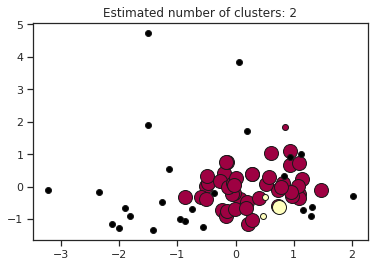

In [111]:
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Gaussian Mixture Models

A Gaussian mixture model finds a mixture of multi-dimensional Gaussian probability distributions that best model the input dataset. 

In [112]:
from sklearn import mixture

In [113]:
mix_data = mixture.GaussianMixture(n_components=4, covariance_type='diag')
mix_data.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

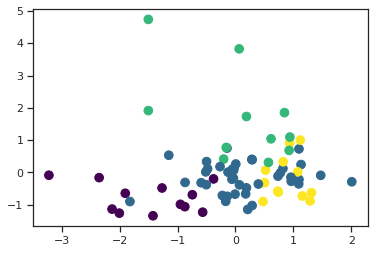

In [114]:
labels = mix_data.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=75, cmap='viridis');

As Gaussian Mixture Models has a probabilistic model so finding a probabilistic cluster assignment.

In [115]:
probs = mix_data.predict_proba(X)

print(probs[:5].round(3))

[[1.    0.    0.    0.   ]
 [0.    0.956 0.044 0.   ]
 [0.    0.972 0.028 0.   ]
 [0.008 0.976 0.013 0.002]
 [1.    0.    0.    0.   ]]


Visualizing the probabilistiv cluster

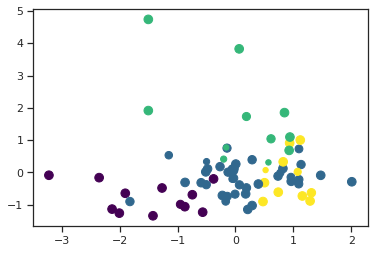

In [116]:
size = 75 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

The calculation of the V-Measure depends on Homogenity and Completeness

Homogenity: A perfectly homogeneous clustering is one where each cluster has data-points belonging to the same class label. 
    Homogeneity describes the closeness of the clustering algorithm to this perfection.
Completeness: A perfectly complete clustering is one where all data-points belonging to the same class are clustered into the same cluster. 
    Completeness describes the closeness of the clustering algorithm to this perfection.